<h3>В цій роботі наведено аналіз кардіограми з допомогою ДПФ (FTT), порівняно використання пам'яті в обох варіантах файлу, та 2 способи фільтрації шумів: за допомогою фільтрів  Баттерворта та Чебишева<h3>

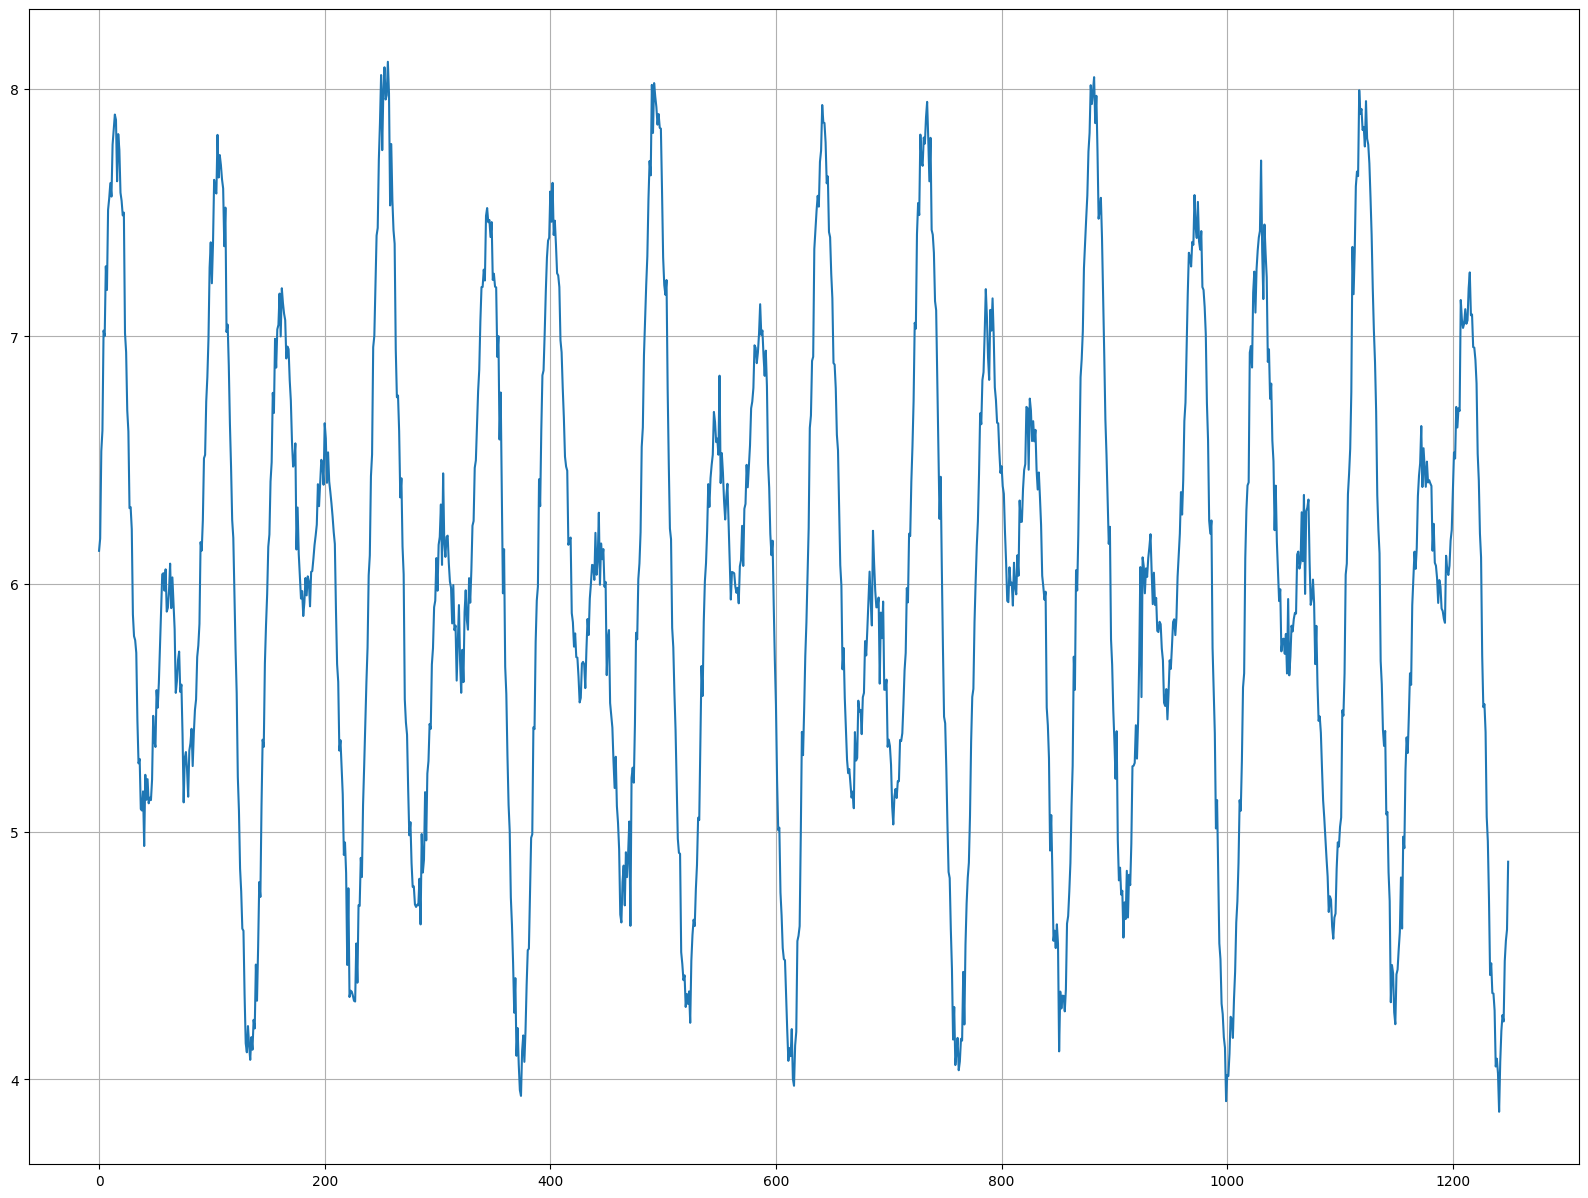

In [102]:
"""імпортуємо файл з ЕКГ"""
import matplotlib.pyplot as plt
with open("ecg.txt", "r", encoding="UTF-8") as file:
    data=[]
    for line in file:
        data.append(float(line))
plt.figure(figsize=(20, 15))
plt.plot(data)
plt.grid(True)
plt.show()

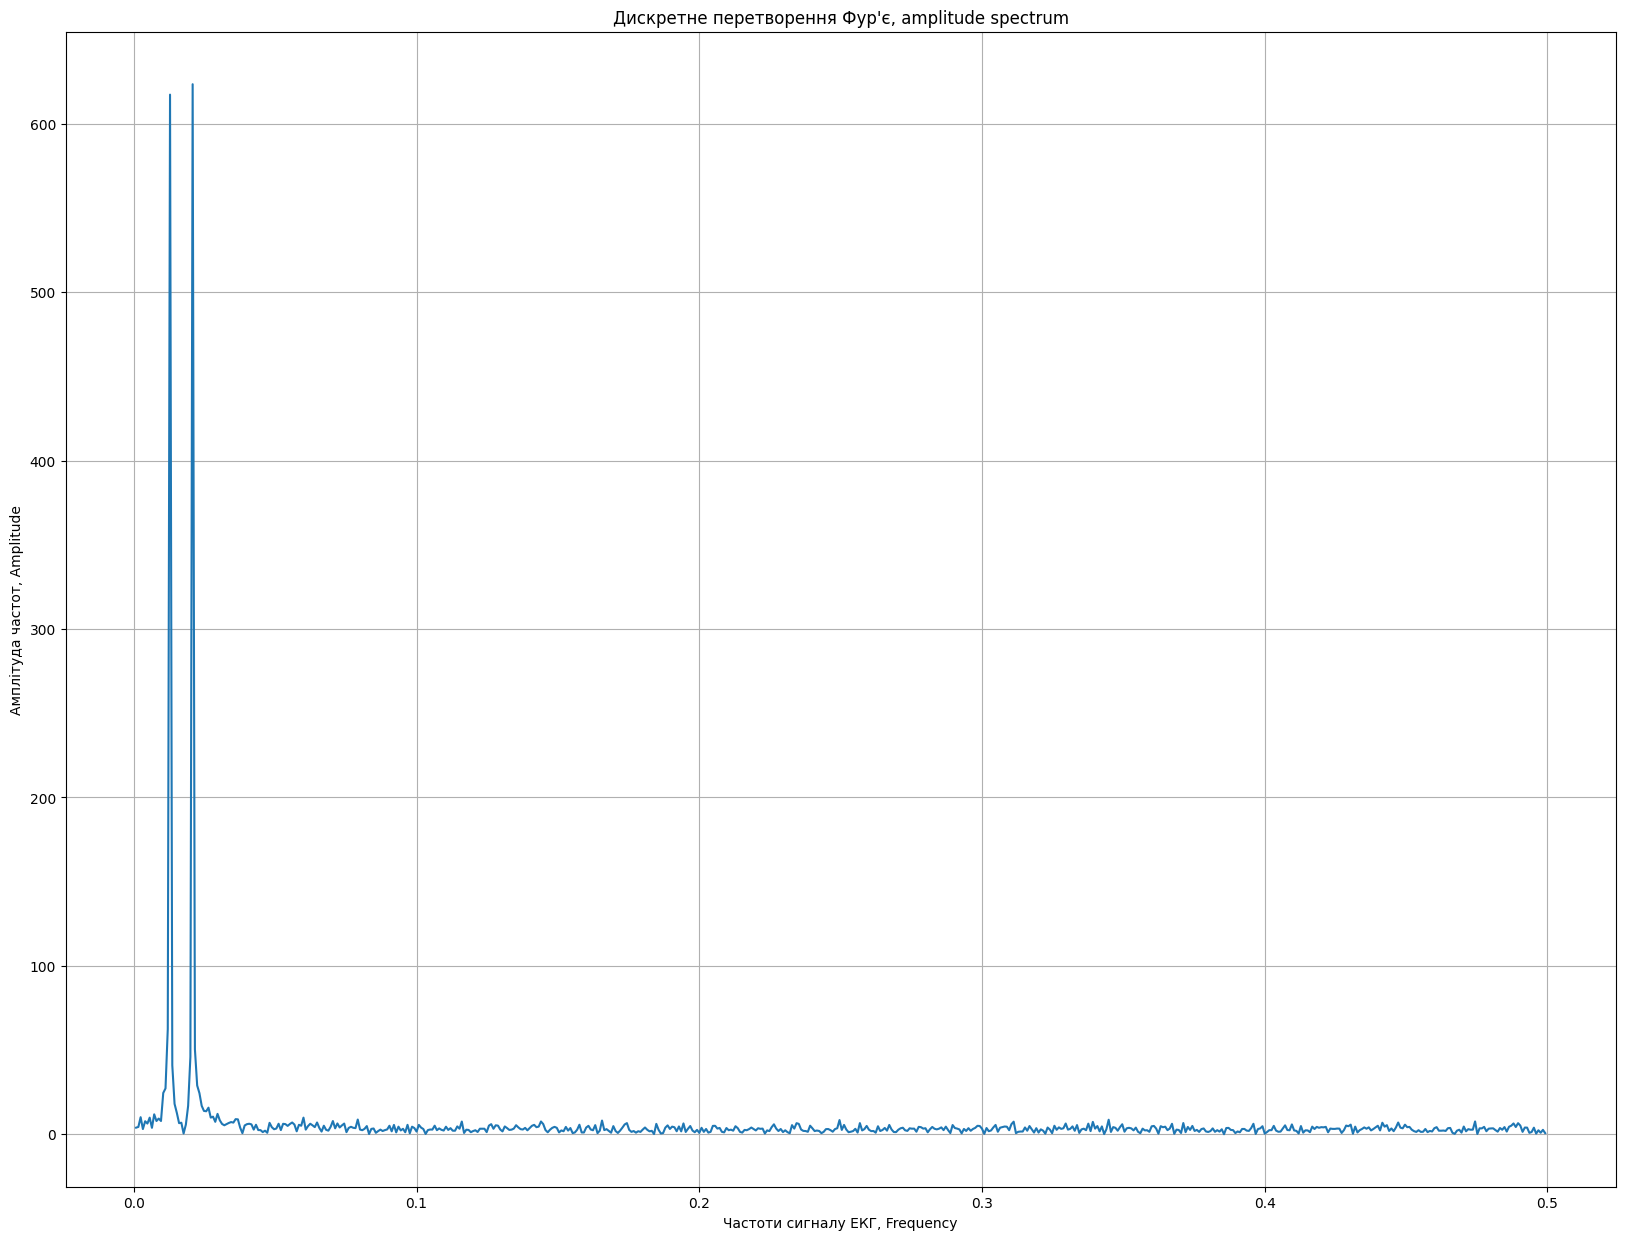

In [103]:
import numpy as np
with open('ecg.txt', 'r') as file:
    data = []
    for line in file:
        columns = line.split()
        data.append(float(columns[0]))
fft_result = np.fft.fft(data)
N = len(data)
freq = np.fft.fftfreq(N)
positive_freq_indices = np.where(freq > 0)
plt.figure(figsize=(20, 15))
plt.plot(freq[positive_freq_indices], np.abs(fft_result[positive_freq_indices]))
plt.xlabel('Частоти сигналу ЕКГ, Frequency')
plt.ylabel('Амплітуда частот, Amplitude')
plt.title("Дискретне перетворення Фур'є, amplitude spectrum")
plt.grid(True)
plt.show()

In [99]:
"""
write FTT into a file

Для порівняння, для 12.5 секунд кардіограми - 23 КБ,
запис цього ж часу після перетворення Фур'є - 18КБ.
"""
with open('fft_results.txt', 'w') as file:
    for f, fft_val in zip(freq[positive_freq_indices], np.abs(fft_result[positive_freq_indices])):
        file.write(f"{f}\t{fft_val}\n")

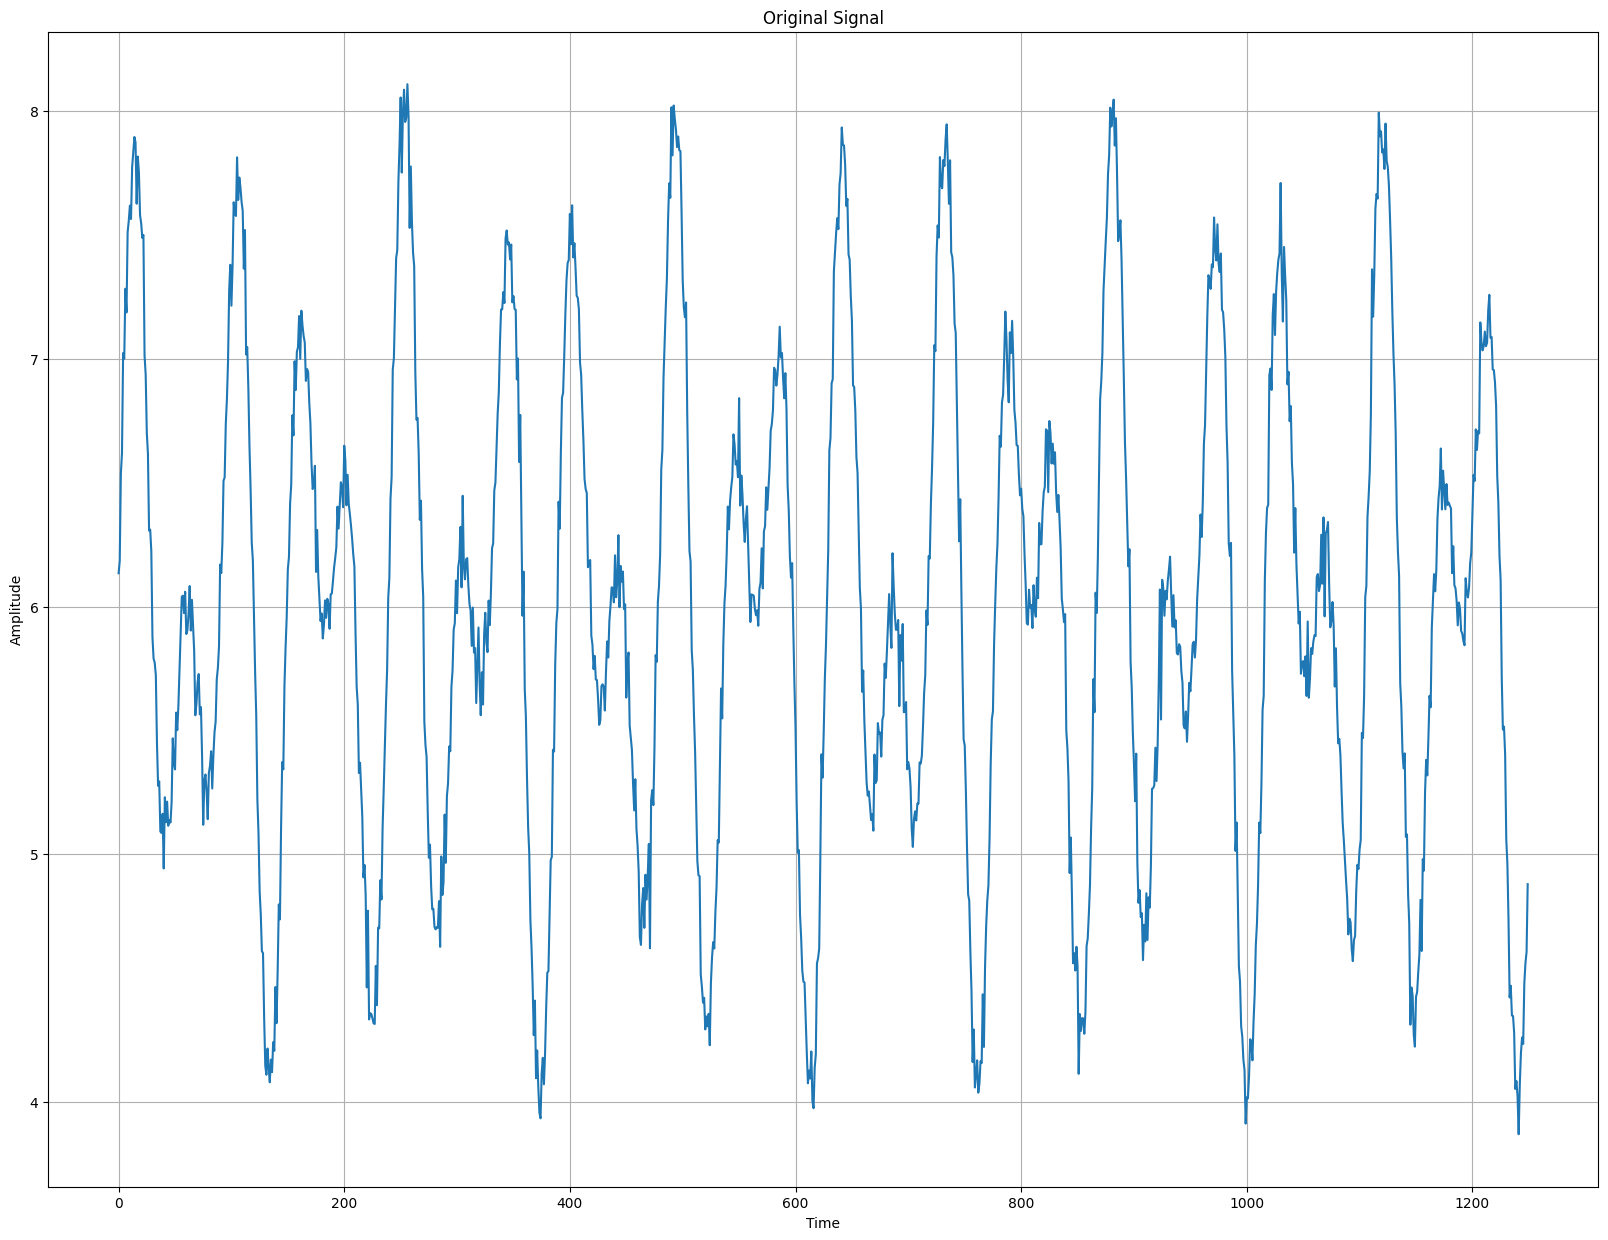

In [100]:
"""
не виникає жодних проблем з перетворенням
сигналу з звичайну форму кардіограми.
"""

inverse_fft_result = np.fft.ifft(fft_result)
plt.figure(figsize=(20, 15))
plt.grid(True)
plt.plot(inverse_fft_result.real)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.show()

<b>Чому саме ряди Фур'є<b>

<i>Перш за все - займає менше пам'яті для зберігання.<i><br>
<i>По-друге - можливість відслідковувати шуми на ЕКГ, від апарату, або серця<i><br>
<i>По-третє, більша можливість подальшого прогнозування здоров'я пацієнта, можливість написання алгоритмів машинного навчання.<i><br>

In [101]:
"""
генеруємо шуми
"""
with open("ecg.txt", "r", encoding="UTF-8") as file:
    ecg_signal = [float(line.strip()) for line in file]
noise = np.random.uniform(0, max(ecg_signal)*0.2, len(ecg_signal))
noisy_ecg_signal = np.array(ecg_signal) + noise

"""
записали в окремий файл    
"""
with open("noisy_ecg.csv", "w", encoding="UTF-8") as file:
    for value in noisy_ecg_signal:
        file.write(f"{value}\n")


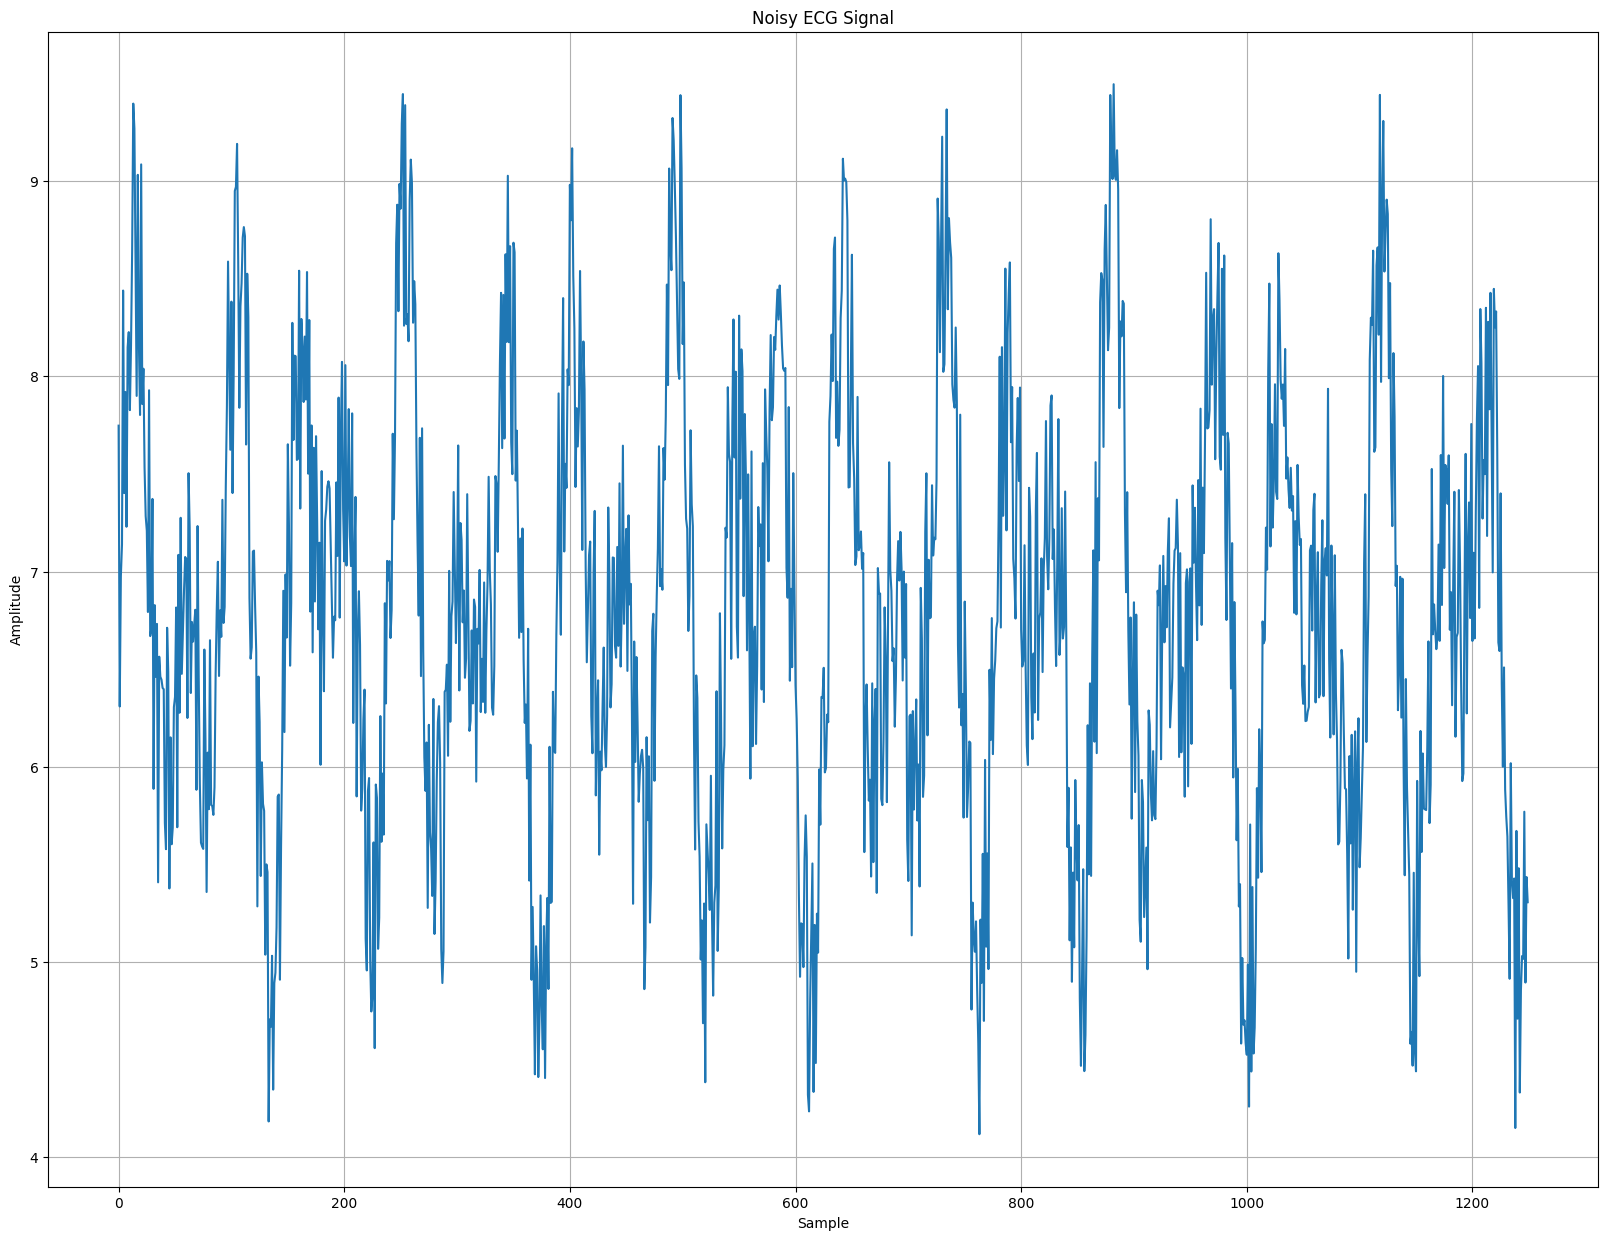

In [82]:
"""    
відображаємо шуми на звичній формі кардіограми
"""
with open("noisy_ecg.csv", "r", encoding="UTF-8") as file:
    data = [float(line.strip()) for line in file]
plt.figure(figsize=(20, 15))
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Noisy ECG Signal')
plt.grid(True)
plt.show()


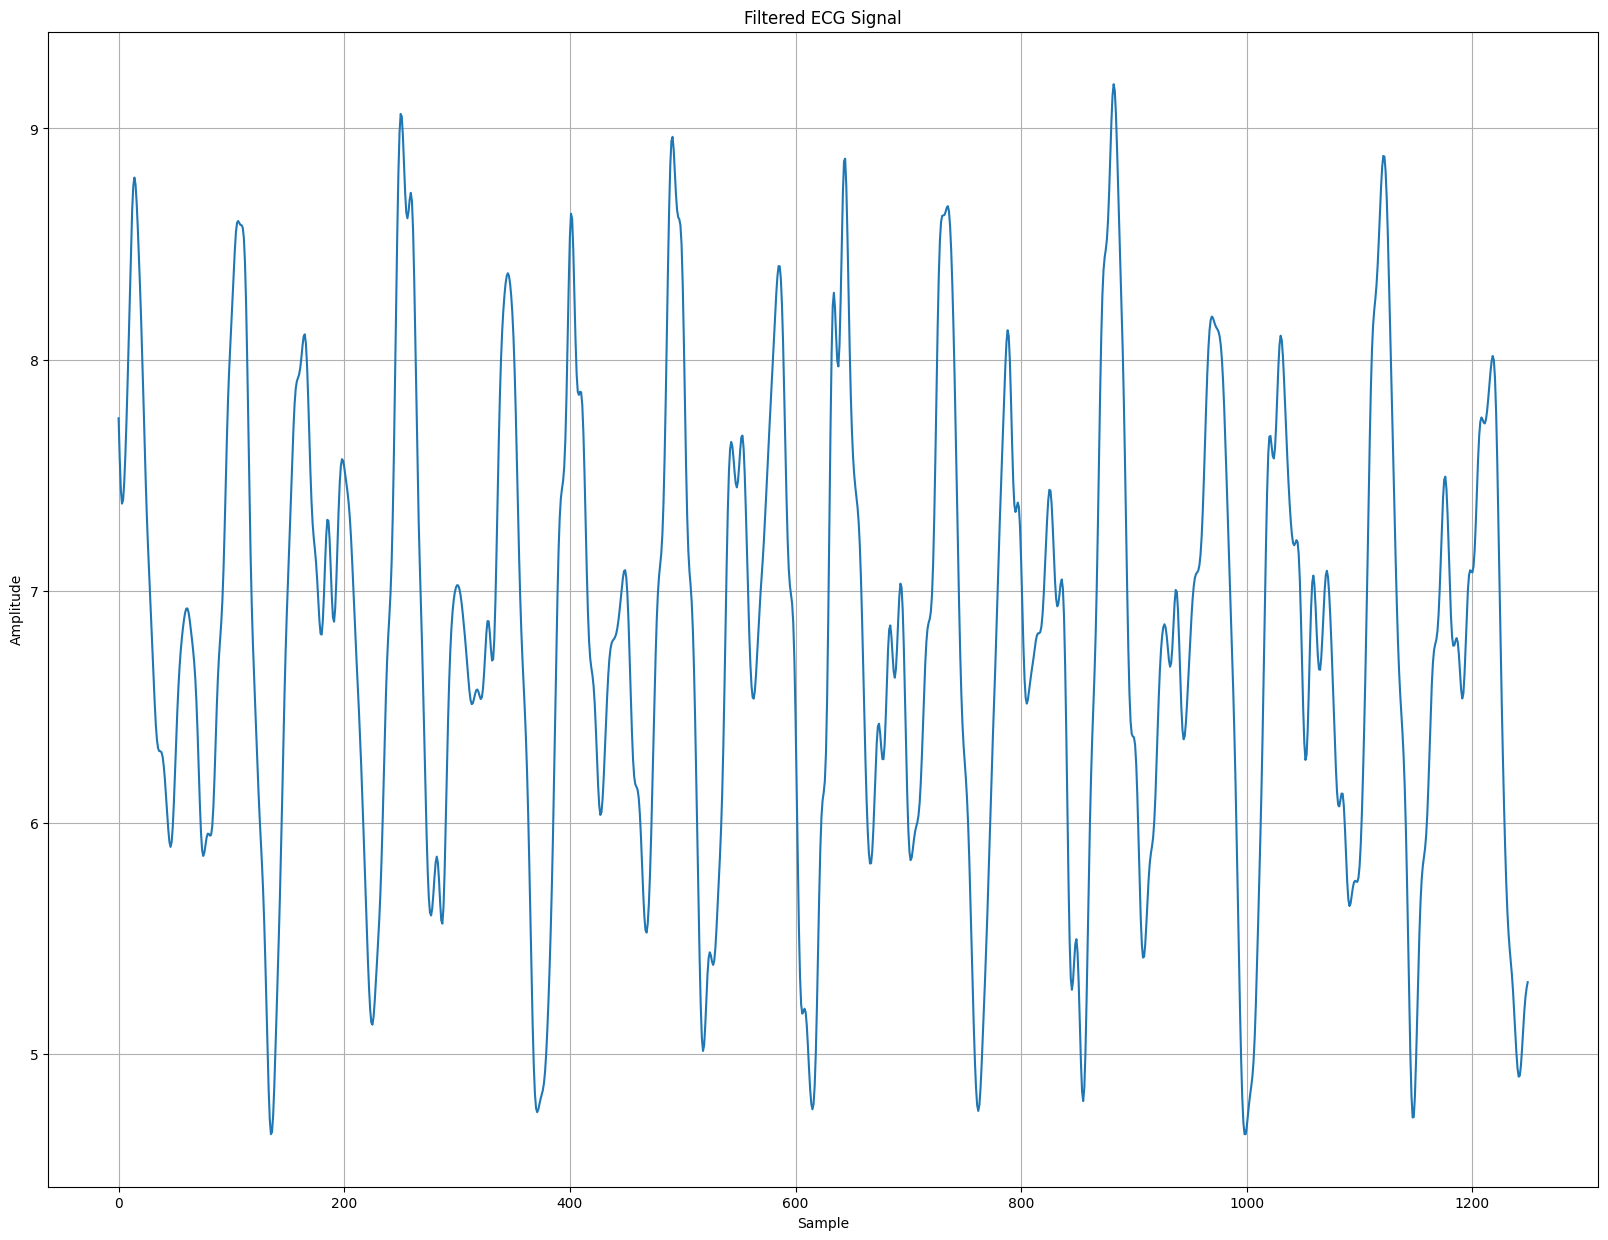

In [83]:
"""
Для того, щоб краще показати можливості ДПФ, використаємо фільтрацію шумів
"""
from scipy.signal import butter, filtfilt
cutoff_frequency = 0.1  # Hz
# припустимо, що частота дискретизації дорівнює 1 Гц
# кількість вимірів за секунду (або за іншу одиницю часу) при перетворенні неперервного сигналу
nyquist_frequency = 0.5  # Nyquist frequency найвища 
# частота сигналу, який може бути відновлений без спотворення
normalized_cutoff = cutoff_frequency / nyquist_frequency
order = 4
b, a = butter(order, normalized_cutoff, btype='low', analog=False)
filtered_signal = filtfilt(b, a, data)
plt.figure(figsize=(20, 15))
plt.plot(filtered_signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signal')
plt.grid(True)
plt.show()

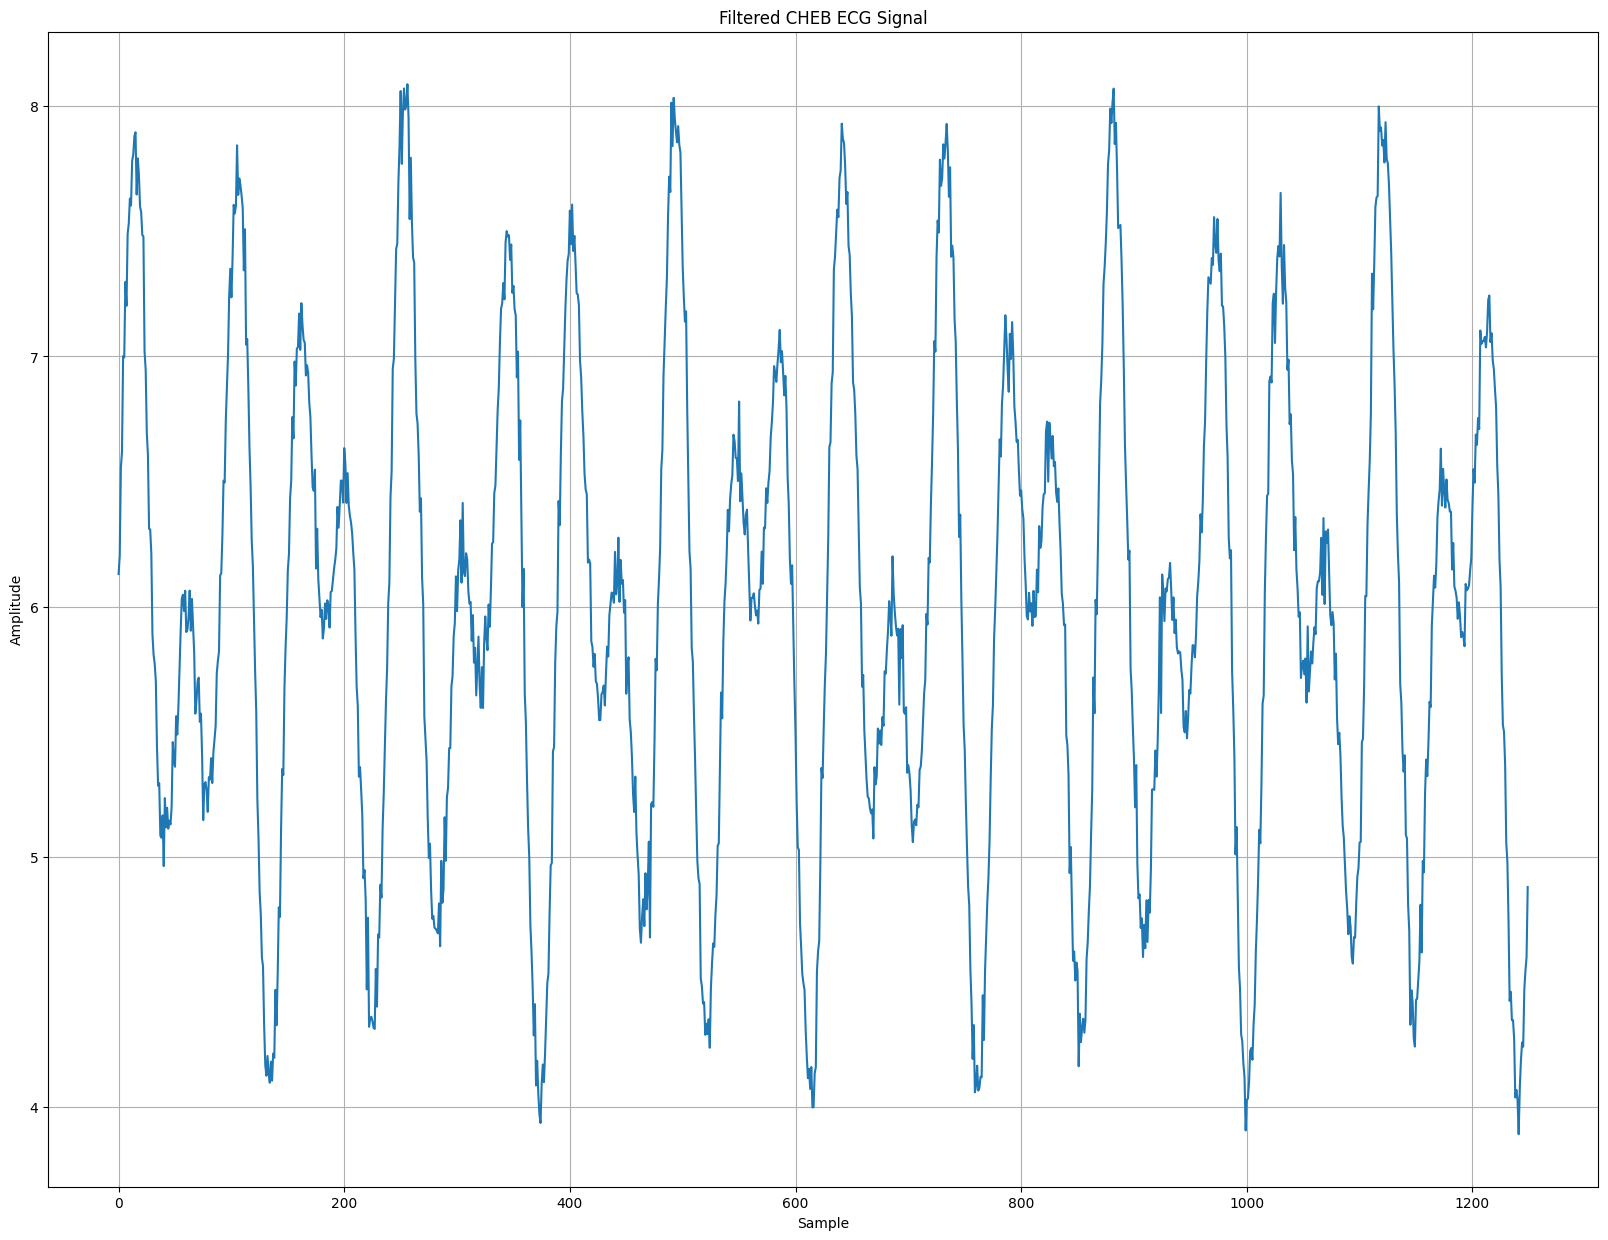

In [97]:
from scipy.signal import cheby2, filtfilt

cutoff_frequency = 0.1  # in Hz
#припустимо, що частота дискретизації дорівнює 1 Гц
nyquist_frequency = 0.5  # Nyquist frequency
normalized_cutoff = cutoff_frequency / nyquist_frequency

order = 4
ripple = 0.1
b, a = cheby2(order, ripple, normalized_cutoff, btype='low', analog=False)  # Chebyshev type II
filtered_signal = filtfilt(b, a, data)
plt.figure(figsize=(20, 15))
plt.plot(filtered_signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Filtered CHEB ECG Signal')
plt.grid(True)
plt.show()


Дякую, дані генерувались на початковому етапі дослідження вручну, на власних замірах серця з допомогою модулю AD8232 Heart Rate Monitor та Аrduino. В файлі ecg.txt використано датасет від Kaggle: https://www.kaggle.com/datasets/devavratatripathy/ecg-dataset

Матеріали про фільтри: https://ukrayinska.libretexts.org/Інженерна/Електротехніка/Електроніка/Мікрохвильова_піч_та_радіочастотна_конструкція_IV%3A_модулі_(Steer)/02%3A_Фільтри/2.07%3A_Фільтри_Баттерворта_та_Чебишева